In [1]:
library(hexView)
library(AER)
library(lmtest)
library(ggplot2)
library(car)
library(carData)
library(strucchange)
library(fBasics)

Warning message:
"package 'AER' was built under R version 4.2.2"
Loading required package: car

Warning message:
"package 'car' was built under R version 4.2.2"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.2.2"
Loading required package: lmtest

Warning message:
"package 'lmtest' was built under R version 4.2.2"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.2.2"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Warning message:
"package 'sandwich' was built under R version 4.2.2"
Loading required package: survival

Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Warning message:
"package 'strucchange' was built under R version 4.2.2"
Warning message:
"package 'fBasics' was built under R version 4.2.2"

Attaching package: 'fBasics'


The following object is masked from 'p

# Bài 6.7

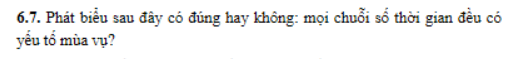

Không, chuỗi thời gian theo năm không có

# Bài 6.9

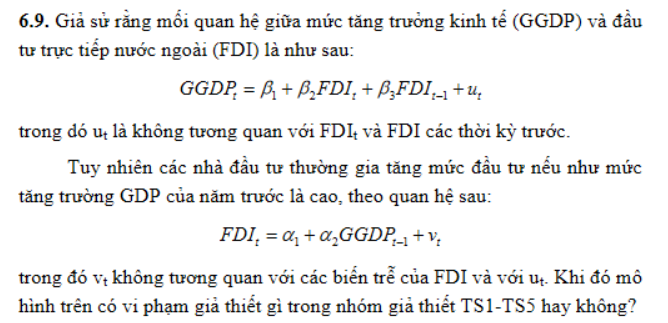

Ta có 
- $GGDP_{t-1}=\beta_1+\beta_2FDI_{t-1}+\beta_3FDI_{t-2}+u_{t-1}
\\
\Rarr FDI_t=\alpha_1+\alpha_2 GGDP_{t-1}+v_t=\alpha_1+\alpha_2 [\beta_1+\beta_2FDI_{t-1}+\beta_3FDI_{t-2}+u_{t-1}]+v_t$

- Vậy $FDI_t$ tương quan với $u_{t-1}$ => Vi phạm TS2

# Bài 6.10

# Bài 6.12

In [2]:
readEViews("ch6bt12.wf1")

Warning message in readEViews("ch6bt12.wf1"):
"Skipping boilerplate variable
"
Warning message in readEViews("ch6bt12.wf1"):
"Skipping boilerplate variable
"


Date,LP,M2,SLSXCN
<date>,<dbl>,<dbl>,<dbl>
2005-01-01,109.7000,5.031314e+05,29247.40
2005-02-01,109.1000,5.102055e+05,27659.70
2005-03-01,108.4000,5.170235e+05,32820.70
2005-04-01,108.5000,5.268843e+05,33937.90
2005-05-01,108.1000,5.331283e+05,34526.60
2005-06-01,107.6000,5.446011e+05,35779.10
2005-07-01,107.5000,5.483523e+05,35617.30
2005-08-01,107.3000,5.667007e+05,36774.20
2005-09-01,107.8000,5.777934e+05,36926.60
